In [3]:
## Import modules
import numpy as np
import pandas as pd
import os 
import csv 
import statistics
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Set up matplotlib to work interactively.
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:

train =pd.read_csv(r'C:\Users\klao\Desktop\ML Project\train.csv')

In [17]:
test =pd.read_csv(r'C:\Users\klao\Desktop\ML Project\test.csv')

In [18]:
from scipy import stats

In [19]:
#descriptive statistics summary
train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [20]:
#found this on stack overflow
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [21]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [22]:
missing_values_table(test)

Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


In [23]:
#MSSubClass should actually be categorical value 

train.loc[train['MSSubClass']==20, 'MSSubClass']='1-STORY 1946 & NEWER ALL STYLES'
train.loc[train['MSSubClass']==30, 'MSSubClass']='1-STORY 1945 & OLDER'
train.loc[train['MSSubClass']==40, 'MSSubClass']='1-STORY W/FINISHED ATTIC ALL AGES'
train.loc[train['MSSubClass']==45, 'MSSubClass']='1-1/2 STORY - UNFINISHED ALL AGES'
train.loc[train['MSSubClass']==50, 'MSSubClass']='1-1/2 STORY FINISHED ALL AGES'
train.loc[train['MSSubClass']==60, 'MSSubClass']='2-STORY 1946 & NEWER'
train.loc[train['MSSubClass']==70, 'MSSubClass']='2-STORY 1945 & OLDER'
train.loc[train['MSSubClass']==75, 'MSSubClass']='2-1/2 STORY ALL AGES'
train.loc[train['MSSubClass']==80, 'MSSubClass']='SPLIT OR MULTI-LEVEL'
train.loc[train['MSSubClass']==85, 'MSSubClass']='SPLIT FOYER'
train.loc[train['MSSubClass']==90, 'MSSubClass']='DUPLEX - ALL STYLES AND AGES'
train.loc[train['MSSubClass']==120, 'MSSubClass']='1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
train.loc[train['MSSubClass']==150, 'MSSubClass']='1-1/2 STORY PUD - ALL AGES'
train.loc[train['MSSubClass']==160, 'MSSubClass']='2-STORY PUD - 1946 & NEWER'
train.loc[train['MSSubClass']==180, 'MSSubClass']='PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
train.loc[train['MSSubClass']==190, 'MSSubClass']='2 FAMILY CONVERSION - ALL STYLES AND AGES'

In [24]:
test.loc[test['MSSubClass']==20, 'MSSubClass']='1-STORY 1946 & NEWER ALL STYLES'
test.loc[test['MSSubClass']==30, 'MSSubClass']='1-STORY 1945 & OLDER'
test.loc[test['MSSubClass']==40, 'MSSubClass']='1-STORY W/FINISHED ATTIC ALL AGES'
test.loc[test['MSSubClass']==45, 'MSSubClass']='1-1/2 STORY - UNFINISHED ALL AGES'
test.loc[test['MSSubClass']==50, 'MSSubClass']='1-1/2 STORY FINISHED ALL AGES'
test.loc[test['MSSubClass']==60, 'MSSubClass']='2-STORY 1946 & NEWER'
test.loc[test['MSSubClass']==70, 'MSSubClass']='2-STORY 1945 & OLDER'
test.loc[test['MSSubClass']==75, 'MSSubClass']='2-1/2 STORY ALL AGES'
test.loc[test['MSSubClass']==80, 'MSSubClass']='SPLIT OR MULTI-LEVEL'
test.loc[test['MSSubClass']==85, 'MSSubClass']='SPLIT FOYER'
test.loc[test['MSSubClass']==90, 'MSSubClass']='DUPLEX - ALL STYLES AND AGES'
test.loc[test['MSSubClass']==120, 'MSSubClass']='1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
test.loc[test['MSSubClass']==150, 'MSSubClass']='1-1/2 STORY PUD - ALL AGES'
test.loc[test['MSSubClass']==160, 'MSSubClass']='2-STORY PUD - 1946 & NEWER'
test.loc[test['MSSubClass']==180, 'MSSubClass']='PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
test.loc[test['MSSubClass']==190, 'MSSubClass']='2 FAMILY CONVERSION - ALL STYLES AND AGES'

In [25]:
#replace MiscFeature nan value and convert it to dummy variable later
train.loc[train['MiscFeature'].isna(), 'MiscFeature']='None'
train.loc[train['Alley'].isna(), 'Alley']='None'
train.loc[train['Fence'].isna(), 'Fence']='None'
train.loc[train['FireplaceQu'].isna(), 'FireplaceQu']='None'
train.loc[train['GarageType'].isna(), 'GarageType']='None'
train.loc[train['GarageFinish'].isna(), 'GarageFinish']='None'
train.loc[train['GarageQual'].isna(), 'GarageQual']='None'
train.loc[train['GarageCond'].isna(), 'GarageCond']='None'
train.loc[train['BsmtExposure'].isna(), 'BsmtExposure']='None'
train.loc[train['BsmtFinType2'].isna(), 'BsmtFinType2']='None'
train.loc[train['BsmtFinType1'].isna(), 'BsmtFinType1']='None'
train.loc[train['BsmtCond'].isna(), 'BsmtCond']='None'
train.loc[train['BsmtQual'].isna(), 'BsmtQual']='None'
train.loc[train['MasVnrType'].isna(), 'MasVnrType']='None'
train.loc[train['Electrical'].isna(), 'Electrical']='None'
train.loc[train['PoolArea'].isna(), 'PoolArea']='None'

In [26]:
#replace MiscFeature nan value and convert it to dummy variable later
test.loc[test['MiscFeature'].isna(), 'MiscFeature']='None'
test.loc[test['Alley'].isna(), 'Alley']='None'
test.loc[test['Fence'].isna(), 'Fence']='None'
test.loc[test['FireplaceQu'].isna(), 'FireplaceQu']='None'
test.loc[test['GarageType'].isna(), 'GarageType']='None'
test.loc[test['GarageFinish'].isna(), 'GarageFinish']='None'
test.loc[test['GarageQual'].isna(), 'GarageQual']='None'
test.loc[test['GarageCond'].isna(), 'GarageCond']='None'
test.loc[test['BsmtExposure'].isna(), 'BsmtExposure']='None'
test.loc[test['BsmtFinType2'].isna(), 'BsmtFinType2']='None'
test.loc[test['BsmtFinType1'].isna(), 'BsmtFinType1']='None'
test.loc[test['BsmtCond'].isna(), 'BsmtCond']='None'
test.loc[test['BsmtQual'].isna(), 'BsmtQual']='None'
test.loc[test['MasVnrType'].isna(), 'MasVnrType']='None'
test.loc[test['Electrical'].isna(), 'Electrical']='None'
test.loc[test['PoolArea'].isna(), 'PoolArea']='None'
test.loc[test['MSZoning'].isna(), 'MSZoning']='None'
test.loc[test['Exterior1st'].isna(), 'Exterior1st']='None'
test.loc[test['Exterior2nd'].isna(), 'Exterior2nd']='None'
test.loc[test['Utilities'].isna(), 'Utilities']='None'
test.loc[test['Functional'].isna(), 'Functional']='None'
test.loc[test['KitchenQual'].isna(), 'KitchenQual']='None'
test.loc[test['SaleType'].isna(), 'SaleType']='None'


In [27]:
#replace value with mean
train.loc[train['LotFrontage'].isna(), 'LotFrontage']=np.nanmean(train.LotFrontage)
train.loc[train['GarageYrBlt'].isna(), 'GarageYrBlt']=np.nanmean(train.GarageYrBlt)
train.loc[train['MasVnrArea'].isna(), 'MasVnrArea']=np.nanmean(train.MasVnrArea)


In [28]:
#replace value with mean
test.loc[test['LotFrontage'].isna(), 'LotFrontage']=np.nanmean(test.LotFrontage)
test.loc[test['GarageYrBlt'].isna(), 'GarageYrBlt']=np.nanmean(test.GarageYrBlt)
test.loc[test['MasVnrArea'].isna(), 'MasVnrArea']=np.nanmean(test.MasVnrArea)
test.loc[test['BsmtFullBath'].isna(), 'BsmtFullBath']=np.nanmean(test.BsmtFullBath)
test.loc[test['BsmtHalfBath'].isna(), 'BsmtHalfBath']=np.nanmean(test.BsmtHalfBath)
test.loc[test['BsmtFinSF1'].isna(), 'BsmtFinSF1']=np.nanmean(test.BsmtFinSF1)
test.loc[test['BsmtFinSF2'].isna(), 'BsmtFinSF2']=np.nanmean(test.BsmtFinSF2)
test.loc[test['BsmtUnfSF'].isna(), 'BsmtUnfSF']=np.nanmean(test.BsmtUnfSF)
test.loc[test['GarageCars'].isna(), 'GarageCars']=np.nanmean(test.GarageCars)
test.loc[test['GarageArea'].isna(), 'GarageArea']=np.nanmean(test.GarageArea)
test.loc[test['TotalBsmtSF'].isna(), 'TotalBsmtSF']=np.nanmean(test.TotalBsmtSF)

In [29]:
missing_values_table(test)

Your selected dataframe has 80 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8


In [30]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5


In [31]:
#check correlation with saleprice
correlation = train.select_dtypes(include = [np.number]).corr()
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


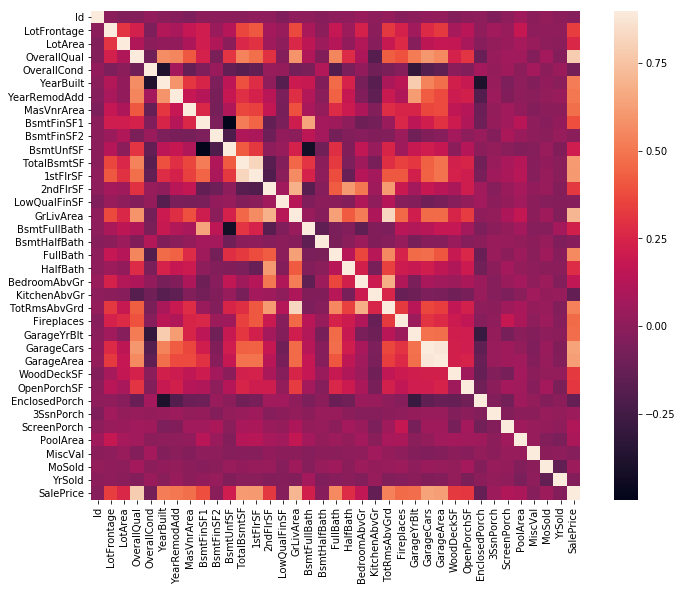

In [32]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

<Figure size 432x288 with 0 Axes>

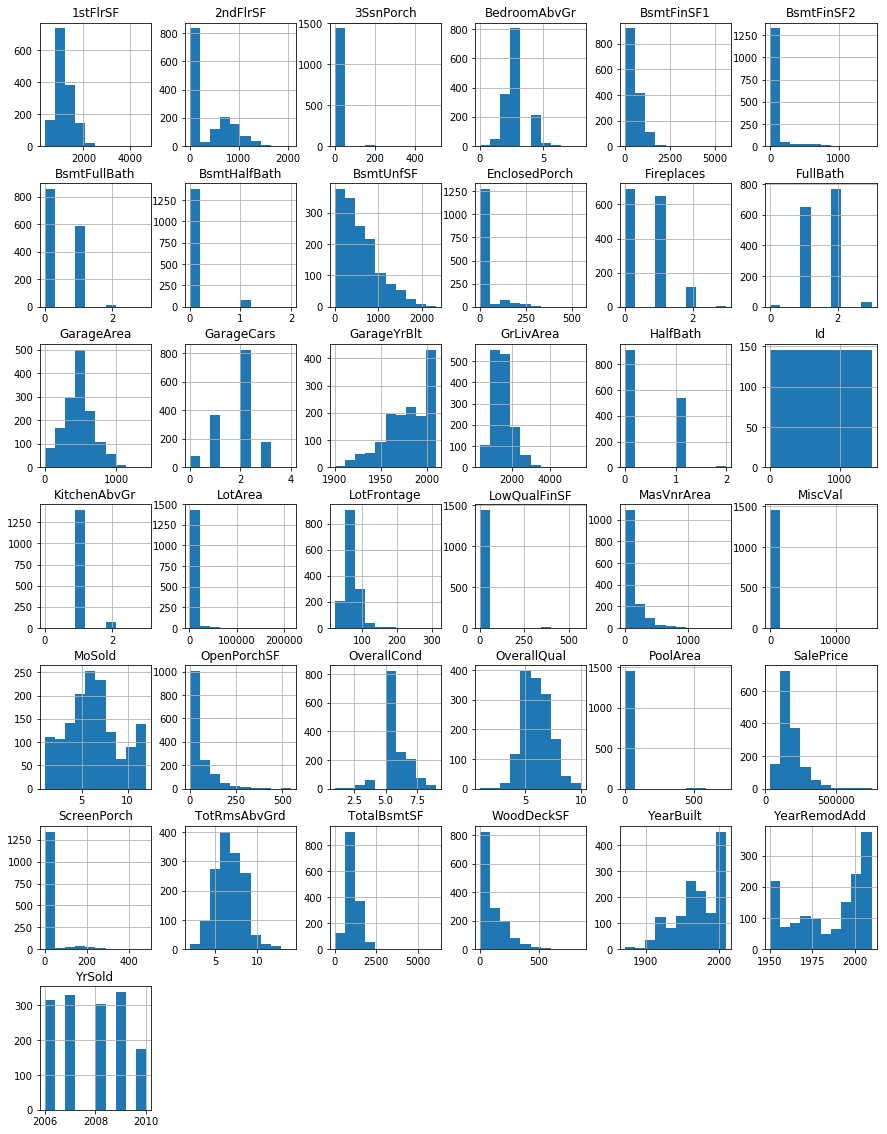

<Figure size 432x288 with 0 Axes>

In [33]:
# histograms
train.hist(figsize=(15,20))
plt.figure()

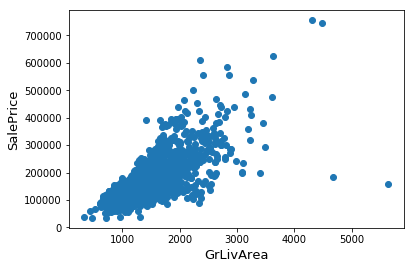

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

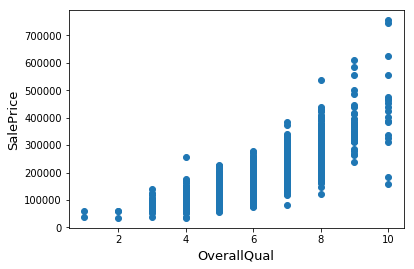

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

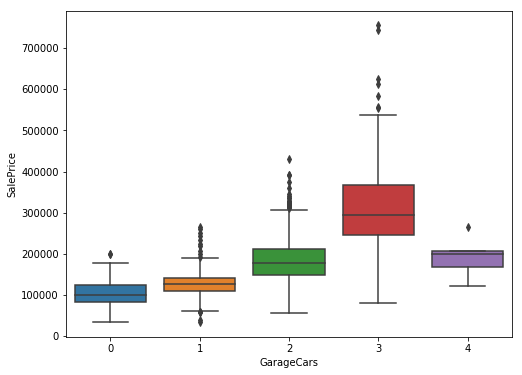

In [36]:
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)

In [37]:
# Caterigorial features distribution 

catcols = train.select_dtypes(['object'])
for cat in catcols:
    print(cat)
    print(train[cat].value_counts())
    print('--'*20)

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64
----------------------------------------
MS

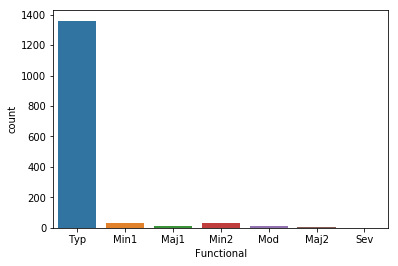

In [38]:
ax = sns.countplot(x="Functional", data=catcols)

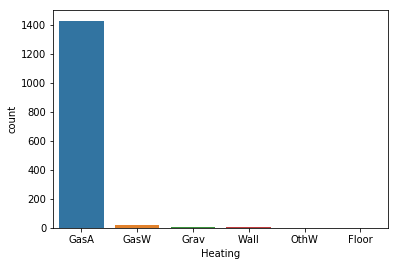

In [39]:
ax = sns.countplot(x="Heating", data=catcols)

In [40]:
#making a new feature and separate out target
train['TotalSF'] = train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF']
target=train['SalePrice']

In [41]:
#Separate out Sales Price and change it to Target 
train.drop('Id', axis=1, inplace=True)
train.drop('MiscVal', axis=1, inplace=True)
train.drop('3SsnPorch', axis=1, inplace=True)
train.drop('LowQualFinSF', axis=1, inplace=True)
train.drop('PoolArea', axis=1, inplace=True)
train.drop('Heating', axis=1, inplace=True)
train.drop('Functional', axis=1, inplace=True)
train.drop('RoofMatl', axis=1, inplace=True)
train.drop('Condition2', axis=1, inplace=True)
train.drop('Street', axis=1, inplace=True)
train.drop('Electrical', axis=1, inplace=True)
train.drop('CentralAir', axis=1, inplace=True)
train.drop('PoolQC', axis=1, inplace=True)
train.drop('MiscFeature', axis=1, inplace=True)
train.drop('Alley', axis=1, inplace=True)
train.drop('Fence', axis=1, inplace=True)
train.drop('TotalBsmtSF', axis=1, inplace=True)
train.drop('1stFlrSF', axis=1, inplace=True)
train.drop('2ndFlrSF', axis=1, inplace=True)
train.drop('SalePrice', axis=1, inplace=True)







In [42]:
#doing the same thing to test 
test['TotalSF'] = test['TotalBsmtSF']+test['1stFlrSF']+test['2ndFlrSF']
Id_test  = test['Id']

test.drop('Id', axis=1, inplace=True)
test.drop('MiscVal', axis=1, inplace=True)
test.drop('3SsnPorch', axis=1, inplace=True)
test.drop('LowQualFinSF', axis=1, inplace=True)
test.drop('PoolArea', axis=1, inplace=True)
test.drop('Heating', axis=1, inplace=True)
test.drop('Functional', axis=1, inplace=True)
test.drop('RoofMatl', axis=1, inplace=True)
test.drop('Condition2', axis=1, inplace=True)
test.drop('Street', axis=1, inplace=True)
test.drop('Electrical', axis=1, inplace=True)
test.drop('CentralAir', axis=1, inplace=True)
test.drop('PoolQC', axis=1, inplace=True)
test.drop('MiscFeature', axis=1, inplace=True)
test.drop('Alley', axis=1, inplace=True)
test.drop('Fence', axis=1, inplace=True)
test.drop('TotalBsmtSF', axis=1, inplace=True)
test.drop('1stFlrSF', axis=1, inplace=True)
test.drop('2ndFlrSF', axis=1, inplace=True)


In [43]:
test.shape

(1459, 62)

In [44]:
train.shape

(1460, 62)

C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


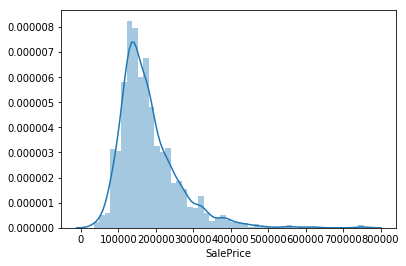

In [45]:
sns.distplot(target)

C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


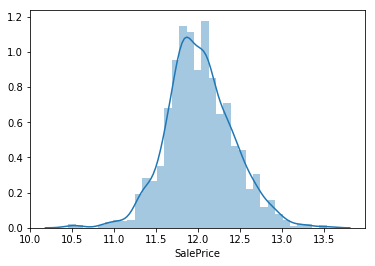

In [46]:
sns.distplot(np.log(target))

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
#Normalize our data 
scaler = MinMaxScaler()
columns= train.select_dtypes(include = [np.number]).columns
train[columns] = scaler.fit_transform(train[columns])

In [49]:
#Normalize our data 
scaler = MinMaxScaler()
columns= test.select_dtypes(include = [np.number]).columns
test.loc[test['TotalSF'].isna(), 'TotalSF']=np.nanmean(test.TotalSF)
test[columns] = scaler.fit_transform(test[columns])

In [50]:
#Log transform Target 
target= target.apply(np.log)

In [54]:
ccolumns= train.select_dtypes(exclude = [np.number]).columns

In [55]:
#Create Dummies Variable 
train= pd.get_dummies(train, prefix=ccolumns,columns=ccolumns)

In [56]:
test= pd.get_dummies(test, prefix=ccolumns,columns=ccolumns)

In [57]:
test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_New', 'SaleType_None', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=256)

In [58]:
train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=255)

In [59]:
# Run PCA to see if we can reduce number of features 

from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=10).fit(train)
pca_samples = pca.transform(train)

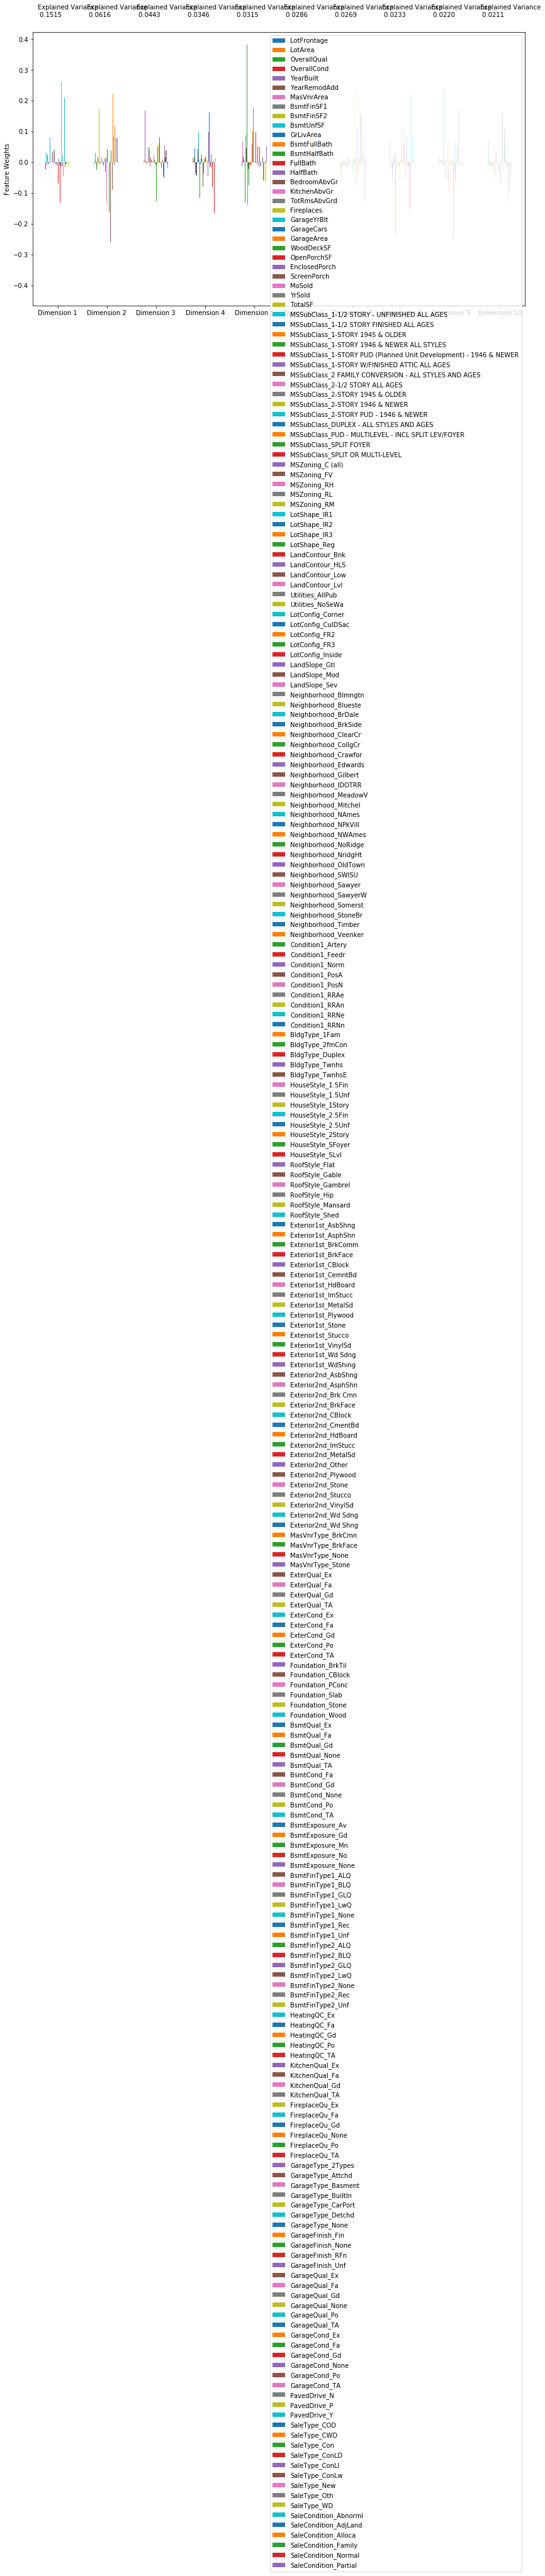

In [77]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(train, pca)

In [78]:
pca_results.cumsum()

,Explained Variance,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Dimension 1,0.1515,0.0092,0.0020,0.0730,-0.0233,0.1154,0.1597,0.0246,0.0107,-0.0076,...,-0.0000,0.0718,-0.0009,-0.0574,-0.0190,-0.0016,-0.0027,-0.0037,-0.0450,0.0719
Dimension 2,0.2131,-0.0121,-0.0078,0.0696,-0.0193,0.0614,0.1868,-0.0014,-0.0246,-0.0322,...,0.0029,0.0921,-0.0009,-0.0690,-0.0131,0.0003,-0.0030,-0.0041,-0.0721,0.0919
Dimension 3,0.2574,-0.0087,-0.0021,0.0835,-0.0066,0.0545,0.1505,0.0160,-0.0276,-0.0304,...,0.0018,-0.0104,-0.0034,0.0480,-0.0311,-0.0009,-0.0044,-0.0053,0.0559,-0.0142
Dimension 4,0.2920,0.0201,0.0116,0.1381,0.0125,-0.0089,0.1369,0.0422,-0.0226,-0.0310,...,0.0029,0.0912,-0.0058,-0.0580,-0.0313,-0.0020,-0.0084,-0.0021,-0.0446,0.0885
Dimension 5,0.3235,0.0077,0.0027,0.1804,-0.0027,0.0188,0.1325,0.1092,-0.0085,-0.0417,...,0.0009,0.1440,-0.0075,-0.1217,-0.0356,-0.0041,-0.0068,0.0043,-0.0978,0.1401
Dimension 6,0.3521,0.0016,0.0078,0.1746,-0.0374,0.0279,0.1169,0.1171,0.0150,-0.0397,...,0.0030,0.1928,-0.0009,-0.1820,-0.0079,0.0071,0.0144,0.0017,-0.2026,0.1874
Dimension 7,0.3790,0.0184,0.0036,0.1575,-0.0654,0.0383,0.1007,0.1331,-0.0148,-0.0572,...,0.0033,0.2771,0.0021,-0.2830,0.0353,0.0117,0.0071,0.0038,-0.3300,0.2722
Dimension 8,0.4023,0.0159,0.0002,0.1540,-0.0924,0.1102,0.1137,0.1549,-0.0154,-0.0684,...,0.0015,0.4099,0.0035,-0.4461,0.0897,0.0112,0.0145,0.0122,-0.5341,0.4065
Dimension 9,0.4243,0.0056,-0.0082,0.1591,-0.0677,0.0877,0.1541,0.1912,-0.0213,-0.0906,...,0.0013,0.3815,0.0057,-0.4483,0.1358,0.0135,-0.0004,0.0121,-0.5379,0.3770
Dimension 10,0.4454,-0.0031,-0.0092,0.1674,-0.0930,0.1206,0.1368,0.1583,-0.0425,-0.0922,...,0.0020,0.5778,0.0114,-0.7174,0.2150,0.0118,0.0037,0.0272,-0.8329,0.5753


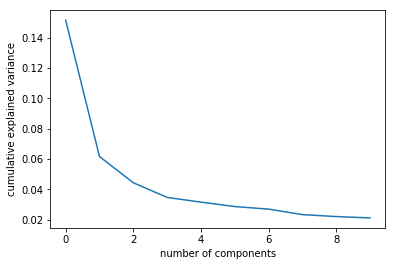

In [79]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

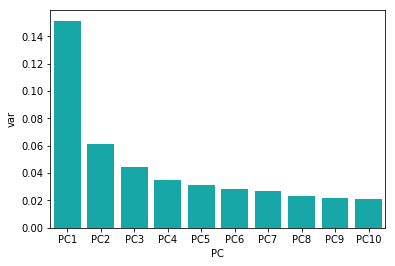

In [80]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [81]:
pcavar = pca.explained_variance_ratio_


In [82]:
def mysum(x):
    s = 0
    s2 = 0
    for e in x:
        s += e * 100
        s2 += 1
        print ("accumulated for PC", s2, "is: %0.6f" %s)

In [83]:
mysum(pcavar)
#Even at 10 PC, it only explained 44% of the data. PCA doesnt seem a good choice 

accumulated for PC 1 is: 15.148295
accumulated for PC 2 is: 21.306437
accumulated for PC 3 is: 25.735641
accumulated for PC 4 is: 29.196741
accumulated for PC 5 is: 32.346810
accumulated for PC 6 is: 35.205440
accumulated for PC 7 is: 37.894655
accumulated for PC 8 is: 40.221360
accumulated for PC 9 is: 42.418499
accumulated for PC 10 is: 44.527212


In [84]:
# Since PCA didnt work, we may look at highly correlated variable to reduce our number of features and better model performance

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [85]:
#Dropping high VIF columns > 5 
x2 = calculate_vif_(train)

C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES' at index: 29
dropping 'MSSubClass_DUPLEX - ALL STYLES AND AGES' at index: 39
dropping 'MSZoning_C (all)' at index: 42
dropping 'LotShape_IR1' at index: 46
dropping 'LandContour_Bnk' at index: 49
dropping 'Utilities_AllPub' at index: 52
dropping 'LotConfig_Corner' at index: 53
dropping 'LandSlope_Gtl' at index: 57
dropping 'Neighborhood_Blmngtn' at index: 59
dropping 'Condition1_Artery' at index: 83
dropping 'BldgType_1Fam' at index: 91
dropping 'HouseStyle_1.5Fin' at index: 95
dropping 'RoofStyle_Flat' at index: 102
dropping 'Exterior1st_AsbShng' at index: 107
dropping 'Exterior1st_CBlock' at index: 110
dropping 'Exterior2nd_AsbShng' at index: 120
dropping 'MasVnrType_BrkCmn' at index: 135
dropping 'ExterQual_Ex' at index: 138
dropping 'ExterCond_Ex' at index: 141
dropping 'Foundation_BrkTil' at index: 145
dropping 'BsmtQual_Ex' at index: 150
dropping 'BsmtQual_None' at index: 152
dropping 'BsmtCond_Fa' at index: 153
dropping 'Bsm

In [106]:
x2.shape

(1460, 158)

In [87]:
vifcol = list(x2.columns)

In [105]:
vifcol.remove('Utilities_NoSeWa')
vifcol.remove('HouseStyle_2.5Fin')
vifcol.remove('Exterior1st_ImStucc')
vifcol.remove('Exterior1st_Stone')
vifcol.remove('Exterior2nd_Other')

ValueError: list.remove(x): x not in list

In [99]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif2["features"] = train.columns

C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [145]:
vif2.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
127,inf,Exterior1st_ImStucc
175,inf,BsmtCond_Fa
162,inf,ExterCond_Po
163,inf,ExterCond_TA
164,inf,Foundation_BrkTil
165,inf,Foundation_CBlock
166,inf,Foundation_PConc
167,inf,Foundation_Slab
168,inf,Foundation_Stone
169,inf,Foundation_Wood


In [101]:
train.shape

(1460, 255)

In [107]:
x2 = x2[vifcol]
x2.shape

(1460, 153)

In [102]:
y2 = test[vifcol]

In [103]:
y2.shape

(1459, 153)

In [ ]:
# Modelling 

In [108]:
# RMSE
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [109]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x2, target, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [110]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,LinearRegression,LassoCV,ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
from sklearn.cross_validation import cross_val_score, cross_val_predict
import statsmodels.api as sm
from scipy import stats


In [111]:
#Linear Regression 
regr = LinearRegression(fit_intercept=True)
regr.fit(x2, target)
y_pred= regr.predict(x2)

In [112]:
print("Linear score on training set: ", mean_squared_error(target, y_pred))

Linear score on training set:  0.026874208767902683


In [113]:
import statsmodels.api as sm
x3 = sm.add_constant(x2)
est = sm.OLS(target, x3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     42.11
Date:                Tue, 20 Nov 2018   Prob (F-statistic):               0.00
Time:                        09:38:16   Log-Likelihood:                 568.46
No. Observations:                1460   AIC:                            -828.9
Df Residuals:                    1306   BIC:                            -14.84
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [114]:
 regr.score(x2, target)

0.8314594770839946

Text(0,0.5,'Predictions')

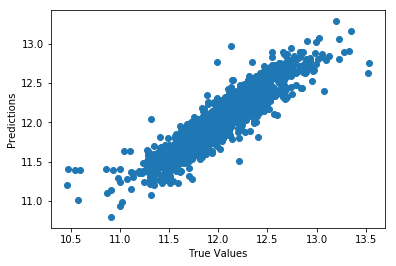

In [115]:
## The line / model
plt.scatter(target, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [116]:
scores = cross_val_score(regr, x2, target, cv=5,scoring='mean_squared_error')
print ('Cross-validated scores:', scores)

Cross-validated scores: [-2.20944976e+23 -7.54865522e+22 -4.49606247e-02 -8.84959861e+22
 -7.48442400e+22]


C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\klao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 

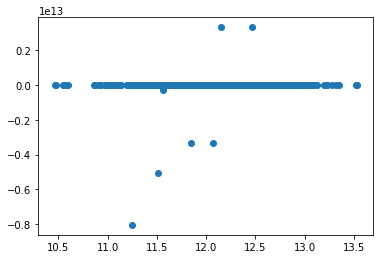

In [117]:
# Make cross validated predictions
predictions = cross_val_predict(regr, x2, target, cv=5)
plt.scatter(target, predictions)

In [118]:
#Lasso Regression  - First we find the best alpha for the lasso 


In [119]:
lasso = LassoCV(cv=5)
lasso.fit(x2, target)
LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [120]:
lasso.alpha_ 

0.0002550007976872466

In [121]:
#Lasso Regression 
lasso = Lasso(alpha=0.0003, max_iter=50000)
lasso.fit(x2, target)


Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
y_pred = lasso.predict(x2)
print("Lasso score on training set: ", mean_squared_error(target, y_pred))

Lasso score on training set:  0.027964519041597035


In [123]:
#accuract socre 
lasso.score(x2, target)

0.8246216399124453

In [124]:
# Cross validation socre 

rmsle_cv(lasso).mean()

0.18577356207667794

Text(0,0.5,'Predictions')

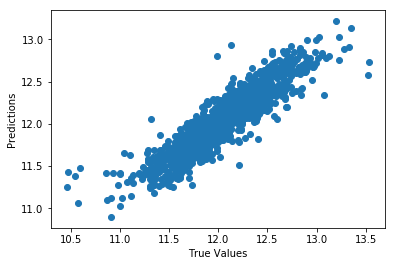

In [125]:
## The line / model
plt.scatter(target, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [128]:
# Ridge Regression 
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x2, target)
ridge.score(x2, target)


0.8298951064218203

In [129]:
y_pred = ridge.predict(x2)
print("Ridge Regression score on training set: ", mean_squared_error(target, y_pred))

Ridge Regression score on training set:  0.027123651590544254


In [130]:
# Cross validation socre 

rmsle_cv(ridge).mean()

0.18874162970670014

Text(0,0.5,'Predictions')

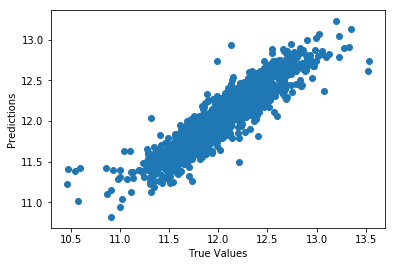

In [131]:
## The line / model
plt.scatter(target, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [132]:
#Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=None)
clf.fit(x2, target)
clf.score(x2, target)

0.9503795922260123

In [133]:
scores_cv = cross_val_score(clf, x2, target, cv=5,scoring='explained_variance')
scores_cv.mean()

0.731424320091258

In [134]:
y_pred = clf.predict(x2)
print("Random Forest Regression score on training set: ", mean_squared_error(target, y_pred))

Random Forest Regression score on training set:  0.007912098376075294


In [135]:
# Cross validation socre 

rmsle_cv(clf).mean()

0.2102882216240875

In [136]:
# Make predictions on test data
predictions = clf.predict(x2)
# Performance metrics
errors = abs(predictions - target)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / target))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 0.06 degrees.
Accuracy: 99.52 %.


Text(0,0.5,'Predictions')

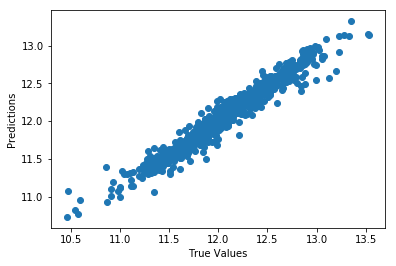

In [137]:
## The line / model
plt.scatter(target, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [138]:
import xgboost as xgb
from sklearn import ensemble

In [139]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x2, target)

In [140]:
GBest.fit(x2,target)
GBest.score(x2, target)

0.9165182744363084

In [141]:
y_pred = regr.predict(x2)
print("xgboost Regression score on training set: ", mean_squared_error(target, y_pred))

xgboost Regression score on training set:  0.026874208767902683


In [142]:
y_pred

array([12.2322824 , 12.09572515, 12.35433996, ..., 12.49567843,
       12.05530816, 12.03479433])

In [162]:
# Cross validation socre 

rmsle_cv(GBest).mean()

0.17766067996981647

Text(0,0.5,'Predictions')

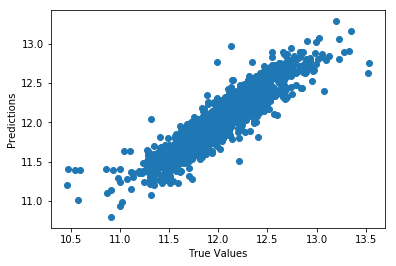

In [143]:
## The line / model
plt.scatter(target, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [146]:
################################################################################

# result to a CSV file.

y_pred =  GBest.predict(y2)
y_pred = np.exp(y_pred)

pred_df = pd.DataFrame(y_pred, index=Id_test, columns=["SalePrice"])
pred_df.to_csv(r'C:\Users\klao\Desktop\ML Project\output6.csv', header=True, index_label='Id')

In [225]:
y_pred

array([166734.06626464,  86057.06059275, 184583.58386806, ...,
       162074.89434482, 162199.77948448,  91198.37023909])

In [212]:
y2.to_csv(r'C:\Users\klao\Desktop\ML Project\output1.csv', header=True, index_label='Id')